In [48]:
import pandas as pd
import geopandas as gpd
import _config
import os

In [110]:
input_taz_shapefile_folder      = _config.input_taz_shapefile_folder
taz_shapefile                   = _config.taz_shapefile
se_years                        = _config.se_years
input_model_se_folder           = _config.input_model_se_folder
se_base_year                    = _config.se_base_year
df_centers                      = _config.df_centers
df_projects                     = _config.df_projects
df_emp_subcategories            = _config.df_emp_subcategories
hh_factor                       = _config.hh_factor
input_tdm_node_shapefile_folder = _config.input_tdm_node_shapefile_folder
tdm_node_shapefile              = _config.tdm_node_shapefile
input_model_line_files_folder   = _config.input_model_line_files_folder
tdm_transit_scenario            = _config.tdm_transit_scenario
map_year                        = _config.map_year

<AxesSubplot:>

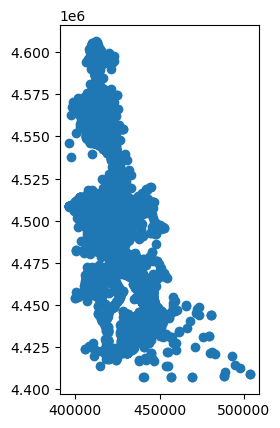

In [50]:
gdf_tdm_node = gpd.read_file(os.path.join(input_tdm_node_shapefile_folder, tdm_node_shapefile))
gdf_tdm_node.plot()

<AxesSubplot:>

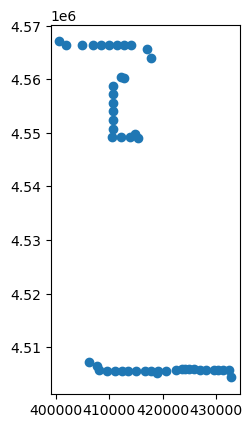

In [51]:
_df_transit_lin_files = pd.read_csv(os.path.join(input_model_line_files_folder, 'files.csv'))
_df_transit_lin_files_lines = pd.read_csv(os.path.join(input_model_line_files_folder, 'lines.csv'))

_df_transit_lin_files_nodes = pd.read_csv(os.path.join(input_model_line_files_folder, 'nodes.csv'))
_df_transit_lin_files_lines = pd.merge(_df_transit_lin_files, _df_transit_lin_files_lines, on=['file_index'])
_df_transit_lin_files_lines_nodes = pd.merge(_df_transit_lin_files_lines, _df_transit_lin_files_nodes, on=['file_index','name'])

df_project_transit_nodes = pd.merge(_df_transit_lin_files_lines_nodes, df_projects, left_on=['model','name'], right_on=['tdm_model','tdm_line_name'])
df_project_transit_nodes = df_project_transit_nodes[df_project_transit_nodes['transit_scenario']==tdm_transit_scenario]
df_project_transit_nodes = df_project_transit_nodes[df_project_transit_nodes['is_stop']==True]
df_project_transit_nodes = df_project_transit_nodes[['project_id','node_id','is_stop']]

gdf_tdm_node_with_projects = pd.merge(gdf_tdm_node, df_project_transit_nodes, left_on='N', right_on='node_id')
gdf_tdm_node_with_projects.plot()

,N,project_id,nearest_AreaType,TAZID,TAZACRES,sqm,acres,geometry
0,15086,2,Neighborhood Center,1472,42.036264,49740.404222,12.291122,"POLYGON ((-111.89909 40.70003, -111.89917 40.7..."
1,15086,2,Neighborhood Center,1473,44.089344,52165.559080,12.890390,"POLYGON ((-111.89461 40.70023, -111.89469 40.7..."
2,15086,2,Neighborhood Center,1481,68.022708,13056.790069,3.226403,"POLYGON ((-111.89687 40.69893, -111.89711 40.6..."
3,15086,2,Neighborhood Center,1482,39.922698,11968.229688,2.957414,"POLYGON ((-111.89490 40.69975, -111.89504 40.6..."
4,15183,1,Neighborhood Center,176,288.616036,35706.046305,8.823156,"POLYGON ((-112.04432 41.24449, -112.04424 41.2..."
...,...,...,...,...,...,...,...,...
173,15069,2,Urban Center,1383,82.068433,163541.758588,40.412049,"POLYGON ((-111.96342 40.69329, -111.96340 40.6..."
174,23506,2,Urban Center,1383,82.068433,10615.218005,2.623077,"POLYGON ((-111.96095 40.69650, -111.96135 40.6..."
175,15069,2,Urban Center,1384,96.889876,208196.248028,51.446413,"POLYGON ((-111.95409 40.69231, -111.95424 40.6..."
176,23506,2,Urban Center,1384,96.889876,34533.423293,8.533395,"POLYGON ((-111.95330 40.69600, -111.95341 40.6..."


<AxesSubplot:>

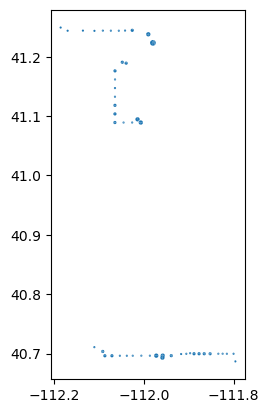

In [52]:
gdf_buffered_stops_with_centers_taz = gpd.read_file('intermediate/buffered-stops-with-centers-taz.geojson')
gdf_buffered_stops_with_centers_taz = gdf_buffered_stops_with_centers_taz.to_crs(epsg=4326)
display(gdf_buffered_stops_with_centers_taz)
gdf_buffered_stops_with_centers_taz.plot()

In [53]:
gdf_se_calcs_to_map = gpd.read_file('_site/data/se_calcs.geojson')
display(gdf_se_calcs_to_map.head(5))

,N,project_id,nearest_AreaType,TAZID,TAZACRES,sqm,acres,pctu_ch,parameter,taz_ratio,...,s_ch,s_tot,s_diff,s_grow,b_tot_den,f_tot_den,s_tot_den,s_grow_den,s_diff_den,geometry
0,15086,2,Neighborhood Center,1472,42.036264,49740.404222,12.291122,0.776678,TOTEMP,0.238638,...,57.277477,100.204991,-92.017686,-72.886896,14.082676,15.639149,8.152632,-5.930044,-7.486517,"POLYGON ((-111.89909 40.70003, -111.89917 40.7..."
1,15086,2,Neighborhood Center,1473,44.089344,52165.559080,12.890390,1.000000,TOTEMP,0.327186,...,77.342342,77.342342,-233.593464,-139.145758,16.794534,24.121520,6.000000,-10.794534,-18.121520,"POLYGON ((-111.89461 40.70023, -111.89469 40.7..."
2,15086,2,Neighborhood Center,1481,68.022708,13056.790069,3.226403,1.000000,TOTEMP,0.041407,...,19.358419,19.358419,-41.496782,-23.015241,13.133405,18.861623,6.000000,-7.133405,-12.861623,"POLYGON ((-111.89687 40.69893, -111.89711 40.6..."
3,15086,2,Neighborhood Center,1482,39.922698,11968.229688,2.957414,0.567510,TOTEMP,0.039493,...,10.070169,23.577939,-7.654608,1.474905,7.473771,10.560763,7.972485,0.498715,-2.588278,"POLYGON ((-111.89490 40.69975, -111.89504 40.6..."
4,15183,1,Neighborhood Center,176,288.616036,35706.046305,8.823156,0.000000,TOTEMP,0.104515,...,0.000000,35.953190,0.000000,35.953190,0.000000,4.074867,4.074867,4.074867,0.000000,"POLYGON ((-112.04432 41.24449, -112.04424 41.2..."


,TAZID,N,project_id,geometry,hhjobint
0,165,15191,1,"POLYGON ((-112.18331 41.24856, -112.18338 41.2...",6.588966
1,172,15185,1,"POLYGON ((-112.07585 41.24448, -112.07575 41.2...",12.855413
2,173,15184,1,"POLYGON ((-112.05810 41.24443, -112.05800 41.2...",1.912349
3,176,15183,1,"POLYGON ((-112.04432 41.24449, -112.04424 41.2...",58.756008
4,176,15184,1,"POLYGON ((-112.05659 41.24548, -112.05637 41.2...",16.995728
...,...,...,...,...,...
173,1521,25351,2,"POLYGON ((-111.81267 40.69934, -111.81275 40.6...",211.719751
174,1521,25602,2,"POLYGON ((-111.79776 40.69937, -111.79784 40.6...",93.701029
175,1530,25381,2,"POLYGON ((-111.79841 40.68714, -111.79838 40.6...",0.340703
176,1531,25381,2,"POLYGON ((-111.79375 40.68647, -111.79383 40.6...",778.008024


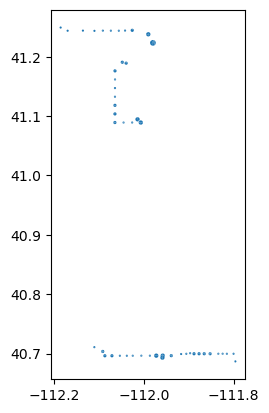

In [54]:
gdf_se_station_buffer_areas = gdf_se_calcs_to_map[gdf_se_calcs_to_map['parameter']=='TOTHHEMP'].groupby(['TAZID','N','project_id','geometry'], as_index=False).agg(hhjobint=('s_tot','sum'))

# Convert the DataFrame back to a GeoDataFrame
gdf_se_station_buffer_areas = gpd.GeoDataFrame(gdf_se_station_buffer_areas, geometry='geometry')

# Ensure the coordinate reference system (CRS) is the same as the original GeoDataFrame
gdf_se_station_buffer_areas.crs = gdf_se_calcs_to_map.crs

# Verify the GeoDataFrame
gdf_se_station_buffer_areas.plot()
gdf_se_station_buffer_areas

In [97]:
df_scenario_hhjobint_taz = gdf_se_station_buffer_areas.groupby(['TAZID'],as_index=False).agg(hhjobint_s=('hhjobint','sum'))
df_scenario_hhjobint_taz

,TAZID,hhjobint_s
0,165,6.588966
1,172,12.855413
2,173,1.912349
3,176,75.751735
4,177,1022.686839
...,...,...
150,1520,132.849241
151,1521,305.420780
152,1530,0.340703
153,1531,778.008024


In [55]:
gdf_se_station_buffer_areas[gdf_se_station_buffer_areas['TAZID']==468]
#10036

,TAZID,N,project_id,geometry,hhjobint
30,468,28117,3,"POLYGON ((-112.05174 41.19088, -112.05170 41.1...",1199.208086


In [56]:
taz_list = gdf_buffered_stops_with_centers_taz['TAZID'].drop_duplicates()
taz_list

0      1472
1      1473
2      1481
3      1482
4       176
       ... 
169    1367
171    1368
173    1383
175    1384
177    1396
Name: TAZID, Length: 155, dtype: int64

<AxesSubplot:>

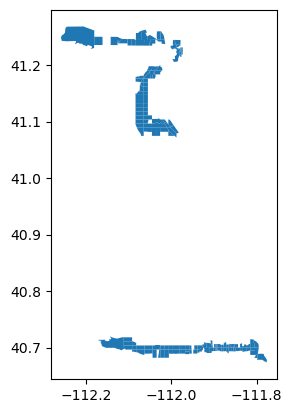

In [57]:
gdf_taz = gpd.read_file('input/taz-shapefile/' + taz_shapefile)
gdf_taz = gdf_taz[gdf_taz['TAZID'].isin(taz_list)]
gdf_taz = gdf_taz[['TAZID','geometry']]
gdf_taz = gdf_taz.to_crs(epsg=4326)
gdf_taz.plot()

In [111]:
#forecast_se_years = [year for year in se_years if year != se_base_year]
#
#display(forecast_se_years)
#
#df_se = pd.DataFrame()
#
#for f_year in forecast_se_years:

_df = pd.read_csv('output/SE_' + str(map_year) + '_transit_corridors.csv')
_df = _df[[';TAZID','TOTHH','TOTEMP']].rename(columns={';TAZID':'TAZID'})
_df['hhjobint_t'] = (_df['TOTHH'] * hh_factor) + _df['TOTEMP']

_df = pd.merge(_df, df_scenario_hhjobint_taz, on='TAZID', how='left').fillna(0)

_df['hhjobint'] = _df['hhjobint_t'] - _df['hhjobint_s']

_df.loc[_df['hhjobint']<0,'hhjobint']=0

_df['YEAR'] = f_year

df_se = _df
# df_se = pd.concat([df_se,_df])

display(df_se)

,TAZID,TOTHH,TOTEMP,hhjobint_t,hhjobint_s,hhjobint,YEAR
0,1,0.0,0.0,0.00,0.0,0.00,2050
1,2,38.5,0.0,69.30,0.0,69.30,2050
2,3,18.5,0.0,33.30,0.0,33.30,2050
3,4,5.3,0.0,9.54,0.0,9.54,2050
4,5,70.5,10.1,137.00,0.0,137.00,2050
...,...,...,...,...,...,...,...
3541,3542,2.0,0.0,3.60,0.0,3.60,2050
3542,3543,0.0,0.0,0.00,0.0,0.00,2050
3543,3544,0.0,0.0,0.00,0.0,0.00,2050
3544,3545,5.0,0.0,9.00,0.0,9.00,2050


<AxesSubplot:>

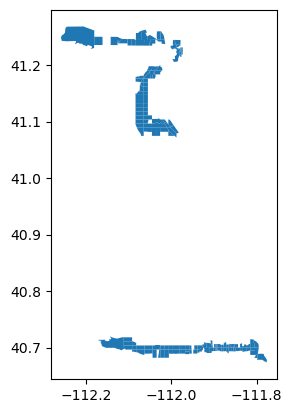

In [112]:
gdf_taz_with_se = pd.merge(gdf_taz, df_se, on='TAZID')
gdf_taz_with_se.plot()

In [113]:
gdf_taz_with_se

,TAZID,geometry,TOTHH,TOTEMP,hhjobint_t,hhjobint_s,hhjobint,YEAR
0,595,"POLYGON ((-112.06452 41.12536, -112.06452 41.1...",1403.2955,720.2381,3246.17000,1313.974208,1932.195792,2050
1,596,"POLYGON ((-112.05488 41.12535, -112.05488 41.1...",961.6869,404.6758,2135.71222,670.343727,1465.368493,2050
2,600,"POLYGON ((-112.07592 41.11810, -112.07560 41.1...",2017.8828,3166.6150,6798.80404,1455.556985,5343.247055,2050
3,601,"POLYGON ((-112.05489 41.11810, -112.05492 41.1...",668.9859,259.7293,1463.90392,410.224842,1053.679078,2050
4,604,"POLYGON ((-112.06448 41.14986, -112.06449 41.1...",701.5600,522.9445,1785.75250,262.943822,1522.808678,2050
...,...,...,...,...,...,...,...,...
150,508,"POLYGON ((-112.05479 41.17617, -112.05478 41.1...",468.8991,72.1371,916.15548,222.213667,693.941813,2050
151,514,"POLYGON ((-112.06445 41.16891, -112.06445 41.1...",371.4820,289.8384,958.50600,283.815978,674.690022,2050
152,515,"POLYGON ((-112.05477 41.16892, -112.05477 41.1...",351.8333,90.6666,723.96654,34.220499,689.746041,2050
153,521,"POLYGON ((-112.06448 41.15439, -112.06448 41.1...",554.3907,316.6409,1314.54416,276.778176,1037.765984,2050


In [147]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# Ensure both GeoDataFrames have the same CRS (e.g., UTM Zone 12N for accurate distance measurement in meters)
gdf_taz_with_se = gdf_taz_with_se.to_crs(epsg=32612)  # UTM Zone 12N
gdf_tdm_node_with_projects = gdf_tdm_node_with_projects.to_crs(epsg=32612)  # UTM Zone 12N

# Calculate the centroids of the polygons
gdf_taz_with_se['centroid'] = gdf_taz_with_se.centroid

# Initialize a list to store the distance data
distance_data = []

# Iterate over each centroid in gdf_taz_with_se
for idx_taz, taz_row in gdf_taz_with_se.iterrows():
    # Get the centroid geometry
    centroid = taz_row['centroid']
    
    # Iterate over each point in gdf_tdm_node_with_projects
    for idx_node, node_row in gdf_tdm_node_with_projects.iterrows():
        # Get the point geometry
        point = node_row['geometry']
        
        # Calculate the distance in meters
        distance_meters = centroid.distance(point)
        
        # Convert the distance to feet (1 meter = 3.28084 feet)
        distance_feet = round(distance_meters * 3.28084, 0)
        
        # Append the data to the list
        if distance_feet <= 10000:

            distance_data.append({
                'TAZID': taz_row['TAZID'],
                'NodeID_t': node_row['N'],  # assuming 'NodeID' is a column in gdf_tdm_node_with_projects
                'taz_distance_feet': distance_feet,
                'taz_hhjobint': taz_row['hhjobint']
            })

# Convert the distance data to a DataFrame
df_distances_taz_to_stop = pd.DataFrame(distance_data)

# Group by 'TAZID' and find the index of the minimum 'taz_distance_feet' for each group
min_distance_indices = df_distances_taz_to_stop.groupby('TAZID')['taz_distance_feet'].idxmin()

# Use the indices to get the rows with the minimum distances
df_distances_taz_to_stop = df_distances_taz_to_stop.loc[min_distance_indices]

# Verify the result
display(df_distances_taz_to_stop)


,TAZID,NodeID_t,taz_distance_feet,taz_hhjobint
536,165,15191,8157.0,775.077734
539,172,15185,2831.0,444.044527
543,173,15184,3935.0,613.987711
547,176,15183,2168.0,994.548265
551,177,15189,447.0,408.200681
...,...,...,...,...
515,1520,25215,1644.0,886.717779
523,1521,25602,1605.0,1715.331680
527,1530,25381,3188.0,2118.459197
530,1531,25381,2840.0,2351.922076


In [148]:
gdf_tdm_node_with_projects[gdf_tdm_node_with_projects['N']==15191]

,N,X,Y,GEOGKEY,EXTERNAL,HOTZN,TAZID,NODENAME,PNR_2015,PNR_2019,...,FARZN23_50,FARE23_32U,FARE23_42U,FARE23_50U,MAG_NODE,WFRC_NODE,geometry,project_id,node_id,is_stop
14,15191,400663.50204,4.567083e+06,NaN,0,0,0,NaN,0,0,...,0,0,0,0,0,0,POINT (400663.502 4567083.113),1,15191,True


In [146]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# Ensure both GeoDataFrames have the same CRS (e.g., UTM Zone 12N for accurate distance measurement in meters)
gdf_se_station_buffer_areas = gdf_se_station_buffer_areas.to_crs(epsg=32612) 
 # UTM Zone 12N
gdf_tdm_node_with_projects  = gdf_tdm_node_with_projects .to_crs(epsg=32612)  # UTM Zone 12N

# Calculate the centroids of the polygons
gdf_se_station_buffer_areas['centroid'] = gdf_se_station_buffer_areas.centroid

# Initialize a list to store the distance data
distance_data = []

# Iterate over each centroid in gdf_se_station_buffer_areas
for idx_area, area_row in gdf_se_station_buffer_areas.iterrows():

    # Get the centroid geometry
    centroid = area_row['centroid']
        
    # Iterate over each point in gdf_tdm_node_with_projects
    for idx_node, node_row in gdf_tdm_node_with_projects.iterrows():
            
        if area_row['N'] == node_row['N']:
            # Get the point geometry
            point = node_row['geometry']
            
            # Calculate the distance in meters
            distance_meters = centroid.distance(point)
            
            # Convert the distance to feet (1 meter = 3.28084 feet)
            distance_feet = round(distance_meters * 3.28084, 0)
        
            if distance_feet==0:
                distance_feet = 1

            distance_data.append({
                'TAZID': area_row['TAZID'],
                'NodeID_a': node_row['N'],  # assuming 'NodeID' is a column in gdf_se_station_buffer_areas
                'area_distance_feet': distance_feet,
                'area_hhjobint': area_row['hhjobint']
            })

# Convert the distance data to a DataFrame
df_distances_area_to_stop = pd.DataFrame(distance_data)

df_distances_area_to_stop = df_distances_area_to_stop.groupby(['TAZID','NodeID_a'], as_index=False).agg(area_distance_feet=('area_distance_feet','mean'), area_hhjobint=('area_hhjobint','sum'))

# Verify the result
display(df_distances_area_to_stop)


,TAZID,NodeID_a,area_distance_feet,area_hhjobint
0,165,15191,1.0,6.588966
1,172,15185,399.0,12.855413
2,173,15184,522.0,1.912349
3,176,15183,409.0,58.756008
4,176,15184,424.0,16.995728
...,...,...,...,...
173,1521,25351,394.0,211.719751
174,1521,25602,283.0,93.701029
175,1530,25381,542.0,0.340703
176,1531,25381,87.0,778.008024


In [152]:
df_distances_taz_to_stop_areas = pd.merge(df_distances_area_to_stop, df_distances_taz_to_stop, on=['TAZID']).fillna(0)
df_distances_taz_to_stop_areas

,TAZID,NodeID_a,area_distance_feet,area_hhjobint,NodeID_t,taz_distance_feet,taz_hhjobint
0,165,15191,1.0,6.588966,15191,8157.0,775.077734
1,172,15185,399.0,12.855413,15185,2831.0,444.044527
2,173,15184,522.0,1.912349,15184,3935.0,613.987711
3,176,15183,409.0,58.756008,15183,2168.0,994.548265
4,176,15184,424.0,16.995728,15183,2168.0,994.548265
...,...,...,...,...,...,...,...
173,1521,25351,394.0,211.719751,25602,1605.0,1715.331680
174,1521,25602,283.0,93.701029,25602,1605.0,1715.331680
175,1530,25381,542.0,0.340703,25381,3188.0,2118.459197
176,1531,25381,87.0,778.008024,25381,2840.0,2351.922076


In [153]:
df_dist_hhjobint = df_distances_taz_to_stop_areas.copy()

df_dist_hhjobint['area_dist_x_int'] = round(df_dist_hhjobint['area_hhjobint'] * df_dist_hhjobint['area_distance_feet'], 0)
df_dist_hhjobint['taz_dist_x_int' ] = round(df_dist_hhjobint['taz_hhjobint' ] * df_dist_hhjobint['taz_distance_feet' ], 0)
df_dist_hhjobint

,TAZID,NodeID_a,area_distance_feet,area_hhjobint,NodeID_t,taz_distance_feet,taz_hhjobint,area_dist_x_int,taz_dist_x_int
0,165,15191,1.0,6.588966,15191,8157.0,775.077734,7.0,6322309.0
1,172,15185,399.0,12.855413,15185,2831.0,444.044527,5129.0,1257090.0
2,173,15184,522.0,1.912349,15184,3935.0,613.987711,998.0,2416042.0
3,176,15183,409.0,58.756008,15183,2168.0,994.548265,24031.0,2156181.0
4,176,15184,424.0,16.995728,15183,2168.0,994.548265,7206.0,2156181.0
...,...,...,...,...,...,...,...,...,...
173,1521,25351,394.0,211.719751,25602,1605.0,1715.331680,83418.0,2753107.0
174,1521,25602,283.0,93.701029,25602,1605.0,1715.331680,26517.0,2753107.0
175,1530,25381,542.0,0.340703,25381,3188.0,2118.459197,185.0,6753648.0
176,1531,25381,87.0,778.008024,25381,2840.0,2351.922076,67687.0,6679459.0


In [154]:
df_dist_hhjobint_group = df_dist_hhjobint.groupby(['TAZID','NodeID_t'], as_index=False).agg(area_dist_x_int_sum=('area_dist_x_int','sum'),area_hhjobint_sum=('area_hhjobint','sum'),
                                                                                 taz_dist_x_int_sum=('taz_dist_x_int','sum'),taz_hhjobint_sum=('taz_hhjobint','sum'))
df_dist_hhjobint_group['area_dist_weighted'] = df_dist_hhjobint_group['area_dist_x_int_sum'] / df_dist_hhjobint_group['area_hhjobint_sum']
df_dist_hhjobint_group['taz_dist_weighted'] = df_dist_hhjobint_group['taz_dist_x_int_sum'] / df_dist_hhjobint_group['taz_hhjobint_sum']

df_dist_hhjobint_group['dist_weighted'] = (df_dist_hhjobint_group['area_dist_x_int_sum'] + df_dist_hhjobint_group['taz_dist_x_int_sum']) / (df_dist_hhjobint_group['area_hhjobint_sum'] + df_dist_hhjobint_group['taz_hhjobint_sum'])

df_dist_hhjobint_group['dist_weighted_miles'] = df_dist_hhjobint_group['dist_weighted'] / 5280

df_dist_hhjobint_group


,TAZID,NodeID_t,area_dist_x_int_sum,area_hhjobint_sum,taz_dist_x_int_sum,taz_hhjobint_sum,area_dist_weighted,taz_dist_weighted,dist_weighted,dist_weighted_miles
0,165,15191,7.0,6.588966,6322309.0,775.077734,1.062382,8156.999899,8088.250401,1.531866
1,172,15185,5129.0,12.855413,1257090.0,444.044527,398.975889,2830.999877,2762.572041,0.523214
2,173,15184,998.0,1.912349,2416042.0,613.987711,521.871360,3935.000580,3924.402930,0.743258
3,176,15183,31237.0,75.751735,4312362.0,1989.096530,412.360191,2168.000364,2103.592343,0.398408
4,177,15189,1023.0,1022.686839,182466.0,408.200681,1.000306,447.000724,128.234398,0.024287
...,...,...,...,...,...,...,...,...,...,...
150,1520,25215,52443.0,132.849241,2915528.0,1773.435558,394.755737,1643.999968,1556.939971,0.294875
151,1521,25602,109935.0,305.420780,5506214.0,3430.663359,359.946039,1604.999798,1503.218019,0.284700
152,1530,25381,185.0,0.340703,6753648.0,2118.459197,542.994217,3188.000038,3187.574721,0.603707
153,1531,25381,67687.0,778.008024,6679459.0,2351.922076,87.000388,2840.000130,2155.685841,0.408274


In [161]:
df_dist_hhjobint_group['MODE'] = 12
df_dist_hhjobint_group['SPEED'] = 2.5  # mph
df_dist_hhjobint_group['DIST'] = round(df_dist_hhjobint_group['dist_weighted_miles'],2)
df_dist_hhjobint_group['COST'] = round(df_dist_hhjobint_group['dist_weighted_miles'] * (1/df_dist_hhjobint_group['SPEED']*60),2)  # it takes 24 minutes to walk 1 mile at 2.5 miles per hour
df_dist_hhjobint_group['ONEWAY'] = 'F'
df_dist_hhjobint_group

,TAZID,NodeID_t,area_dist_x_int_sum,area_hhjobint_sum,taz_dist_x_int_sum,taz_hhjobint_sum,area_dist_weighted,taz_dist_weighted,dist_weighted,dist_weighted_miles,MODE,SPEED,DIST,COST,ONEWAY
0,165,15191,7.0,6.588966,6322309.0,775.077734,1.062382,8156.999899,8088.250401,1.531866,12,2.5,1.53,36.76,F
1,172,15185,5129.0,12.855413,1257090.0,444.044527,398.975889,2830.999877,2762.572041,0.523214,12,2.5,0.52,12.56,F
2,173,15184,998.0,1.912349,2416042.0,613.987711,521.871360,3935.000580,3924.402930,0.743258,12,2.5,0.74,17.84,F
3,176,15183,31237.0,75.751735,4312362.0,1989.096530,412.360191,2168.000364,2103.592343,0.398408,12,2.5,0.40,9.56,F
4,177,15189,1023.0,1022.686839,182466.0,408.200681,1.000306,447.000724,128.234398,0.024287,12,2.5,0.02,0.58,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1520,25215,52443.0,132.849241,2915528.0,1773.435558,394.755737,1643.999968,1556.939971,0.294875,12,2.5,0.29,7.08,F
151,1521,25602,109935.0,305.420780,5506214.0,3430.663359,359.946039,1604.999798,1503.218019,0.284700,12,2.5,0.28,6.83,F
152,1530,25381,185.0,0.340703,6753648.0,2118.459197,542.994217,3188.000038,3187.574721,0.603707,12,2.5,0.60,14.49,F
153,1531,25381,67687.0,778.008024,6679459.0,2351.922076,87.000388,2840.000130,2155.685841,0.408274,12,2.5,0.41,9.80,F


In [164]:
# Open a file for writing (this will overwrite any existing file)
with open('output/Scenario_hand_coded_walk_links.NTL', 'w') as f:
    # Iterate through each row in the dataframe
    for index, row in df_dist_hhjobint_group.iterrows():
        # Format the line
        line = f"NT LEG={row['TAZID']:>6} - {row['NodeID_t']:>6},  MODE={row['MODE']},  COST={row['COST']:>4.2f},  DIST={row['DIST']:>4.2f},  ONEWAY={row['ONEWAY']},  SPEED={row['SPEED']:>4.2f}\n"
        # Write the line to the file
        f.write(line)

print("Lines written to output.txt")

Lines written to output.txt
